In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')   #importing neccessary libraries for data analysis and visualisation

In [4]:
df=pd.read_excel(r"D:\AIML\Course4\Assignment\1688640705_hr_comma_sep.xlsx")#reading the excel file into dataframe

In [5]:
df.info()  #basic information of dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
data_dic=pd.read_excel(r"D:\AIML\Course4\Assignment\data_dic-ETA.xlsx") #reading the description of columns in given dataframe
pd.set_option('display.max_colwidth',None)
data_dic

,Column Name,Description
0,satisfaction_level,satisfaction level at the job of an employee
1,last_evaluation,"Rating between 0 to 1, received by an employee at his last evaluation"
2,number_project,"Number of projects, an employee involved in"
3,average_montly_hours,"Average number of hours in a month, spent by an employee at office"
4,time_spend_company,Number of years spent in the company
5,Work_accident,"0 - no accident during employee stay, 1 - accident during employee stay"
6,left,"0 indicates employee stays in the company,1 indicates - employee left the company"
7,promotion_last_5years,Number of promotions in his stay
8,Department,"Department, an employee belongs to"
9,salary,Salary in USD


In [7]:
df.head()  #displaying first 5 rows in the dataframe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 1. Data Cleaning

In [8]:
df.rename(columns={'average_montly_hours':'average_monthly_hours','sales':'Department'},inplace=True) 
       #renaming the columns by correcting spelling and column name

Renaming the columns name 

In [9]:
df.isnull().sum()   #Checking for Null Values

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

No null values in the given dataset

In [10]:
df1=df.drop(['Department','salary'],axis=1)

# 2. EDA

# 2.1 Correlation using heatmap

In [11]:
df1.corr()  #correlation between various numerical variables

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

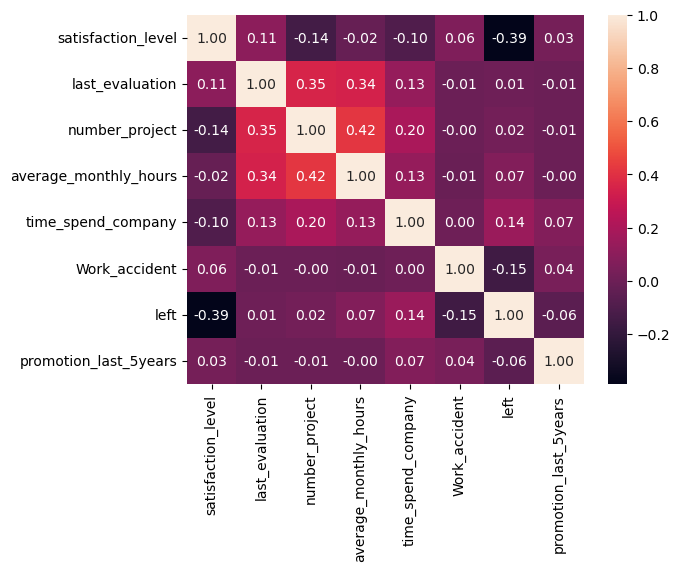

In [10]:
sns.heatmap(df1.corr(),annot=True,fmt=".2f")  #Heatmap showing Correlation

1. Number of projects and Average Monthly hours - positively correlated
2. Number of projects and last_evaluation - positively correlated
3. Satisfaction level and Employees left - negatively correlated - lower the satisfaction, employees left is high 

# 2.2 Distribution plots

<Axes: xlabel='satisfaction_level', ylabel='Count'>

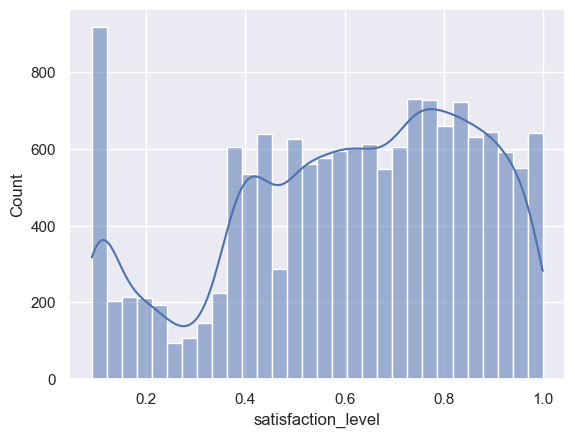

In [12]:
sns.set_theme()
sns.histplot(df1['satisfaction_level'],kde=True)

<Axes: xlabel='last_evaluation', ylabel='Count'>

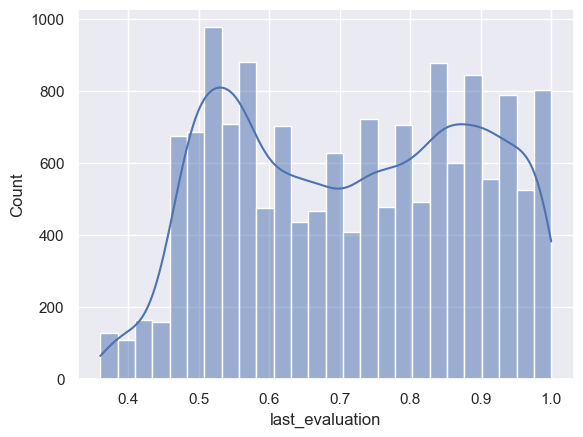

In [13]:
sns.histplot(df1['last_evaluation'],kde=True)

<Axes: xlabel='average_monthly_hours', ylabel='Count'>

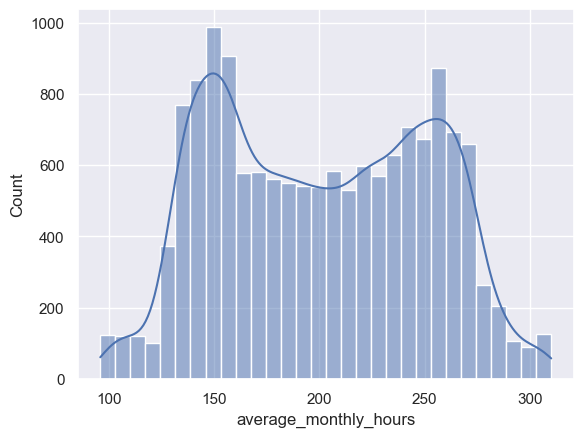

In [14]:
sns.histplot(df1['average_monthly_hours'],kde=True)

Distribution were not normal

# 2.3 Bar plot showing Number of projects and employees left

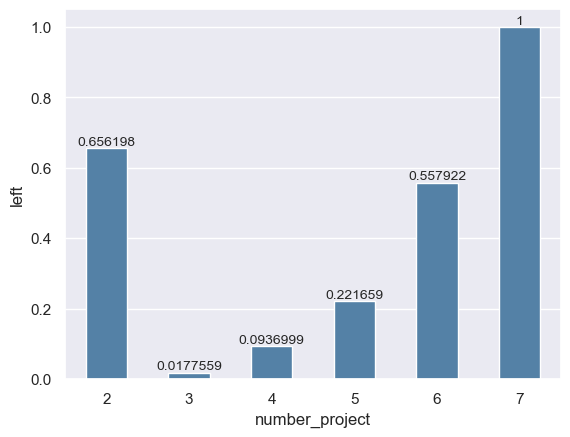

In [15]:
sns.set_theme() 
ax=sns.barplot(df1,x='number_project',y='left',width=0.5,errorbar=None,color='steelblue')
for i in ax.containers:
    ax.bar_label(i,fontsize=10)

1.People with very less number of projects allotted (say 2) and high number of projects (say 6 and 7) left the company

2.People with medium number of projects allotted (say 3,4 and 5) stayed in the company.

It shows that Employees with more number of projects allotted resigned may be due to too much work pressue and with less number of projects left due to inadequate exposure and development

In [18]:
df1.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<Axes: xlabel='average_monthly_hours', ylabel='satisfaction_level'>

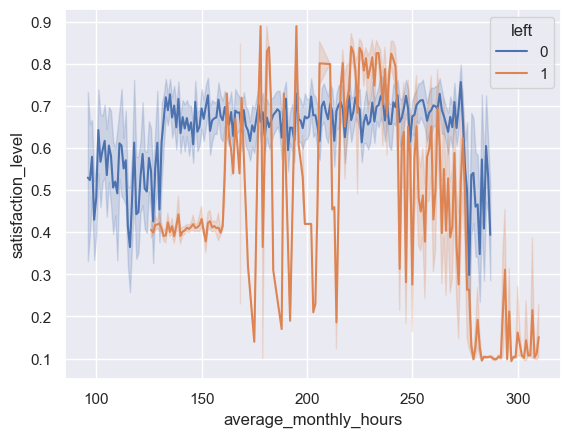

In [11]:
sns.set_theme()
sns.lineplot(df1,x='average_monthly_hours',y='satisfaction_level',hue='left')

Employees with high average monthly hours, had low satisfaction level and thus left the organisation 

<Axes: xlabel='last_evaluation', ylabel='average_monthly_hours'>

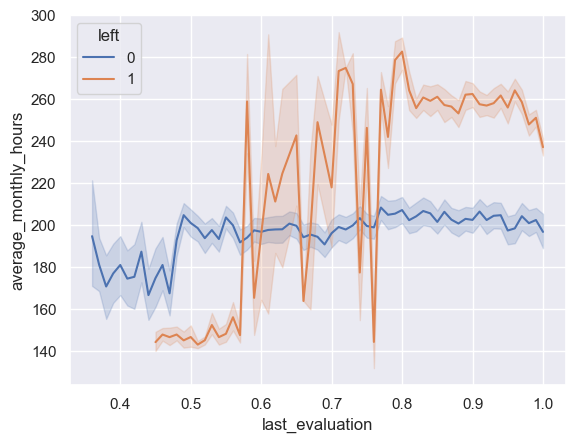

In [17]:
sns.set_theme()
sns.lineplot(df1,y='average_monthly_hours',x='last_evaluation',hue='left')#,width=0.5,errorbar=None,color='steelblue')

Employees who got good remarks in last evaluation also resigned whose average monthly working hours exceeded the mean value

<Axes: xlabel='last_evaluation', ylabel='satisfaction_level'>

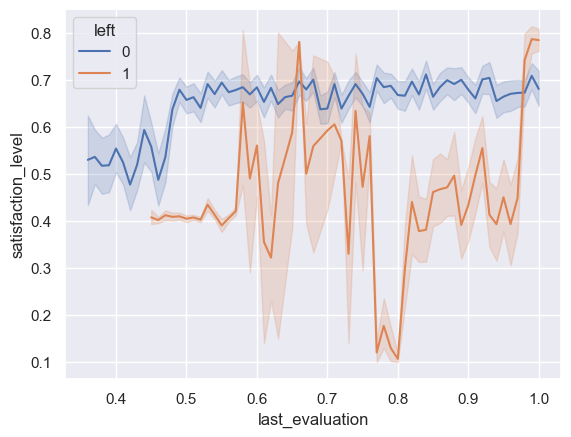

In [18]:
sns.lineplot(df1,x='last_evaluation',y='satisfaction_level',hue='left')

Comparing the line plots between various variables, average monthly hours, greatly contributed to the satisfaction level whoch in turn affected the employee turnover directly

In [19]:
df1.groupby(['number_project','left']).mean().sort_values(['satisfaction_level'])

,,satisfaction_level,last_evaluation,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years
number_project,left,,,,,,
7,1,0.118711,0.859609,276.078125,4.113281,0.015625,0.000000
6,1,0.128366,0.861389,270.132824,4.087023,0.053435,0.004580
2,1,0.412948,0.518571,146.310147,3.027441,0.046586,0.007658
6,0,0.456570,0.692100,199.017341,4.325626,0.190751,0.032755
3,1,0.579861,0.753194,218.986111,3.958333,0.013889,0.000000
2,0,0.604397,0.663812,187.125457,3.472594,0.181486,0.030451
5,0,0.657971,0.722122,203.094928,3.449046,0.180084,0.023267
4,0,0.689181,0.725210,201.305106,3.305612,0.165824,0.028564
3,0,0.689618,0.715910,197.119257,3.274416,0.178007,0.023851


<Axes: xlabel='number_project'>

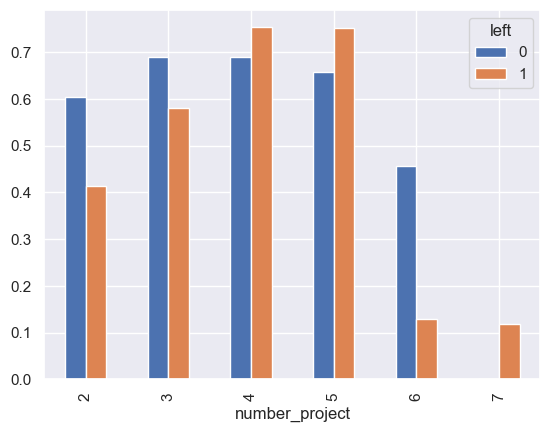

In [20]:
df1.pivot_table(index='number_project',values='satisfaction_level',columns='left').plot(kind='bar')

Employees who were allotted high number of projects and very low(say 2) allotted, had low satisfaction level and who didnot get promotion in the last 5 years majorly left the company

In [9]:
df.pivot_table(index='salary',columns='promotion_last_5years',values='left',aggfunc='sum')

promotion_last_5years,0,1
salary,,
high,82,0
low,2158,14
medium,1312,5


Mostly Employees in low and medium salary but no promotion in the last 5 years left the organisation
(82+2158+1312+14+5=3571 employees)

In [64]:
df['left'].value_counts() #finding the number of employees who left the organisation

0    11428
1     3571
Name: left, dtype: int64

3571 employees left the company

<Axes: xlabel='left', ylabel='Count'>

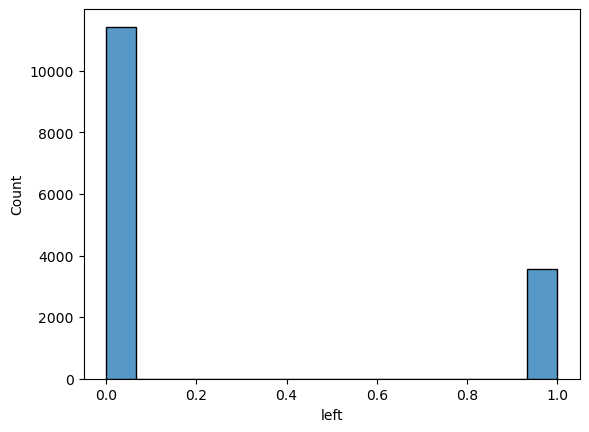

In [13]:
sns.histplot(df['left'])

# 3. Clustering

In [37]:
from sklearn.cluster import KMeans   #importing KMeans Clustering module from scikit-learn

In [38]:
df_cluster=df[df['left']==1]#Clustering of employees who left the company based on similar characters

In [39]:
df_cluster.iloc[:,[0,1,6]].head() #clustering based on satisfaction level and last evaluation

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1


In [45]:
X=df_cluster.iloc[:,[0,1]].values

In [46]:
Cluster1=KMeans(n_clusters=3,init='k-means++',random_state=2) 
                 #CLustering employees into 3 groups and predicting the model based on Kmeans Clustreing
ykmeans=Cluster1.fit_predict(X)

In [47]:
ykmeans

array([0, 1, 2, ..., 0, 2, 0])

In [48]:
Cluster1.inertia_

27.007707973602813

Within clusters square of error is 27.007

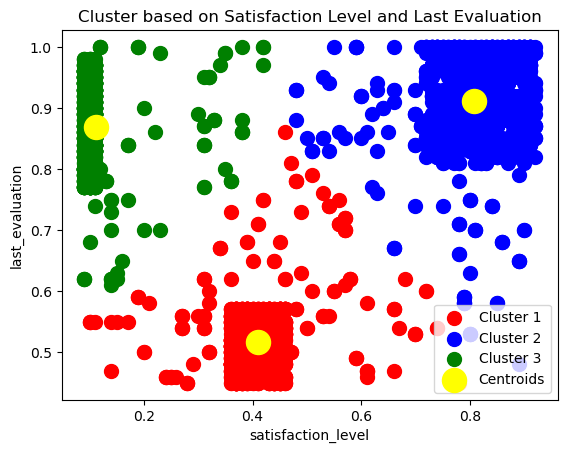

In [49]:
X=df_cluster.iloc[:,[0,1]].values
plt.scatter(X[ykmeans == 0,0],X[ykmeans == 0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[ykmeans == 1,0],X[ykmeans == 1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[ykmeans == 2,0],X[ykmeans == 2,1],s=100,c='green',label='Cluster 3')
plt.scatter(Cluster1.cluster_centers_[:,0],Cluster1.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Cluster based on Satisfaction Level and Last Evaluation')
plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')
plt.legend()
plt.show()


Clustering of employees who left the organisation into 3 groups based on
   1. High Satisfaction level and better remarks in last evaluation 
   2. Medium satisfaction level and average to better remarks in last evaluation
   3. Low satisfaction level and better remarks in last evaluation

# 4.Preprocessing of data by converting categorical to numerical variables

In [12]:
df['Department'].value_counts() #determining the unique number of employees in various departments

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [13]:
df['salary'].unique() #unique values in salary

array(['low', 'medium', 'high'], dtype=object)

In [14]:
#Label Encoding for Salary              
from sklearn import preprocessing
enc= preprocessing.LabelEncoder()
df['salary_num']= enc.fit_transform(df['salary'])+1
df.pivot_table(columns='salary',values='salary_num')

salary,high,low,medium
salary_num,1,2,3


In [16]:
#OnehotEncoding for Department
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder(max_categories=10)
arr=enc.fit_transform(df[['Department']]).toarray()
arr.shape

(14999, 10)

In [17]:
df_new=pd.get_dummies(df,columns=['salary','Department'])#Converting categorical to numerical values using get_dummies in pandas
pd.set_option('display.max_columns',100)
df_new.drop(['salary_num'],axis=1,inplace=True)
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


# 5.1 Logistic Regression model

In [18]:
X=df_new.drop(['left'],axis=1)# all variables other than left are taken as X variable
y=df_new['left']              #taking left as y variable that has to be predicted based on traning data

In [19]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold 
                  #importing modules for splitting the data and for crossvalidation 
from sklearn.linear_model import LogisticRegression #importing Logistic Regression module

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123) 
                 # test_size denotes 20% data used for testing and 80% for training the model

In [21]:
logistic_regression=LogisticRegression()#building the model using logistic regression
logistic_regression.fit(X_train,y_train)  #fitting the training data into a Ml model

LogisticRegression()

In [22]:
y_test_predict=logistic_regression.predict(X_test)#predicting y values based on the derived model

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(y_test, y_test_predict)  #Confusion matrix
cm

array([[2137,  154],
       [ 488,  221]], dtype=int64)

In [24]:
print(classification_report(y_test, y_test_predict)) #Classification Report
print("Accuracy is:",(accuracy_score(y_test,y_test_predict)*100),'%')

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2291
           1       0.59      0.31      0.41       709

    accuracy                           0.79      3000
   macro avg       0.70      0.62      0.64      3000
weighted avg       0.76      0.79      0.76      3000

Accuracy is: 78.60000000000001 %


Inference:
    1. Accuracy is 78%
    2. Precision - 154 employees who will not leave the organisation is predicted as will leave
    3. Recall - 488 employees who will leave the organisation are not identified --->
        0.31 is very low value -- which may be due to left class imbalance
        
Here in the Employee Turnover Analytics, Recall value is important as the model may fail to identify the potential employees who may leave the organisation. Thus making it better, the organisation can identify and frame strategies to retain them.


# Upsampling using SMOTE Technique

In [28]:
y_train.value_counts()

0    9137
1    2862
Name: left, dtype: int64

In [29]:
from imblearn.over_sampling import SMOTE

In [75]:
sm=SMOTE(random_state=23)
X_train_smote,y_train_smote=sm.fit_resample(X_train,y_train)

In [76]:
y_train_smote.value_counts()

0    9137
1    9137
Name: left, dtype: int64

# 5.1.1 Logistic regression model using SMOTE

In [34]:
LR_smote=LogisticRegression()
LR_smote.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [35]:
y_testpredict_LRsmote=LR_smote.predict(X_test)

In [74]:
confusion_matrix(y_test,y_testpredict_LRsmote)

array([[1775,  516],
       [ 183,  526]], dtype=int64)

In [36]:
print(classification_report(y_test,y_testpredict_LRsmote))

              precision    recall  f1-score   support

           0       0.91      0.77      0.84      2291
           1       0.50      0.74      0.60       709

    accuracy                           0.77      3000
   macro avg       0.71      0.76      0.72      3000
weighted avg       0.81      0.77      0.78      3000



Recall value improved to 0.74 from 0.31 after using SMOTE for handling imbalanced dataset, thus can reduce misclassification

In [79]:
from sklearn.metrics import roc_auc_score
print('ROC-AUC score is:',roc_auc_score(y_test,y_testpredict_LRsmote))

ROC-AUC score is: 0.7583304141612576


In [87]:
k_folds=KFold(n_splits=5) #Cross Validation
scores=cross_val_score(logistic_regression, X, y, cv = k_folds)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.40933333 0.91166667 0.91266667 0.86866667 0.54684895]
0.73 accuracy with a standard deviation of 0.21


In [81]:
def roc_auc(y_test_predicted):
    import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
    fpr, tpr, threshold = metrics.roc_curve(y_test,y_test_predicted)
    roc_auc = metrics.auc(fpr, tpr)
    print('ROC-AUC value is:',roc_auc)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

ROC-AUC value is: 0.7583304141612576


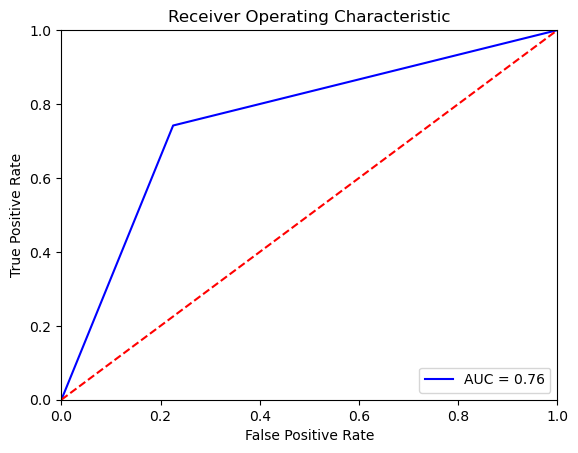

In [82]:
roc_auc(y_testpredict_LRsmote) #ROC-AUC value for Logistic Regression model

# 5.2 Random Forest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier=RandomForestClassifier(n_estimators=10,criterion='entropy')  #choosing 10 decision trees predicting the model
RFclassifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [84]:
y_testpredict_RFC=RFclassifier.predict(X_test)

In [85]:
scores=cross_val_score(RFclassifier, X, y, cv = k_folds)  #Cross Validation
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.99 accuracy with a standard deviation of 0.02


In [86]:
cm_RFC= confusion_matrix(y_test, y_testpredict_RFC) #Confusion matrix for Random Forest Classifier
cm_RFC  

array([[2279,   12],
       [  20,  689]], dtype=int64)

In [46]:
print(classification_report(y_test,y_testpredict_RFC))  #Classification Report and Accuracy Score
print('Accuracy is:',accuracy_score(y_test,y_testpredict_RFC)*100,'%')

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2291
           1       0.99      0.97      0.98       709

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

Accuracy is: 99.13333333333333 %


Inference:
    1. Accuracy is 99%
    2. Precision is 0.99
    3. Recall is 0.97 -- 20 employees who are about to leave are not identified correctly

ROC-AUC value is: 0.9855601024183057


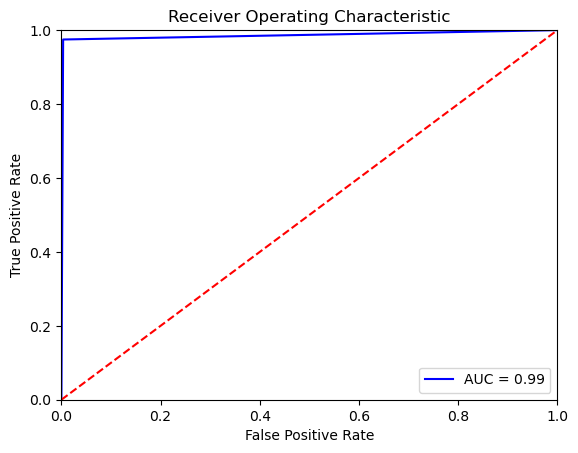

In [47]:
roc_auc(y_testpredict_RFC) #ROC-AUC curve

# 5.3 Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier 
GBclassifier= GradientBoostingClassifier(learning_rate=0.1,n_estimators=10)
GBclassifier.fit(X_train,y_train)  #constructing the model using training data

GradientBoostingClassifier(n_estimators=10)

In [49]:
y_testpredict_GBC=GBclassifier.predict(X_test) #predicting y variable using the predicted model - Gradient boosting Classifier

In [50]:
cm_GBC= confusion_matrix(y_test, y_testpredict_GBC) #Confusion matrix 
cm_GBC

array([[2259,   32],
       [  58,  651]], dtype=int64)

58 employees who may leave are not identified 

In [51]:
print(classification_report(y_test, y_testpredict_GBC)) #Classification report
print('Accuracy is:',accuracy_score(y_test, y_testpredict_GBC)*100,'%')

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2291
           1       0.95      0.92      0.94       709

    accuracy                           0.97      3000
   macro avg       0.96      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000

Accuracy is: 97.0 %


In [52]:
scores=cross_val_score(GBclassifier, X, y, cv = k_folds)  #Cross Validation
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print(scores)

0.94 accuracy with a standard deviation of 0.08
[0.778      0.98833333 0.98633333 0.97933333 0.94598199]


ROC-AUC value is: 0.9521134703220243


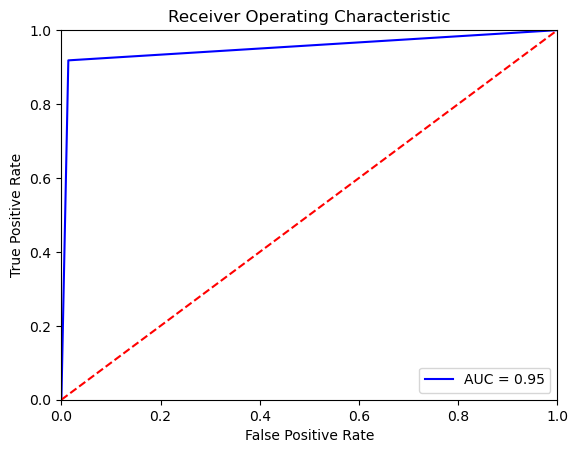

In [53]:
roc_auc(y_testpredict_GBC)

# 6.Employee Turnover Probability - Categorisation of employees 

Among the three models built using Logistic Regression, Random forest Classifier and Gradient Boosting, 
Random forest classifier was found to be better in terms of Accuracy, Recall and Precision

In [88]:
prob=RFclassifier.predict_proba(X_test)#Probability of predicted value to which class it belongs
prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [89]:
y_test #data taken for testing

6958     0
7534     0
2975     0
3903     0
8437     0
        ..
1229     1
10593    0
12248    1
3147     0
6623     0
Name: left, Length: 3000, dtype: int64

In [90]:
y_testpredict_RFC #y varibale predicted

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

Creating a new dataframe based on test data to categorise employees into 4 zones,based on their probability of leaving the organisation

In [55]:
new_df=pd.DataFrame(data=X_test) 

In [56]:
new_df1=new_df.iloc[:,[0,1,2,3,4,5,6,7,8,9]]

In [58]:
new_df1.head(3)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium
6958,0.54,0.67,3,154,2,0,0,1,0,0
7534,0.72,0.52,3,143,4,1,0,0,1,0
2975,0.95,0.61,3,267,2,0,0,0,1,0


In [91]:
new_df1['prob_ET_RFC']=prob[:,1] #probabilities of employee that they will leave the organisation
new_df1['y_predict_RFC']=y_testpredict_RFC  #predicted y values

In [92]:
new_df1.tail()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,prob_ET_RFC,y_predict_RFC
1229,0.42,0.55,2,148,3,0,0,0,1,0,1.0,1
10593,0.61,0.67,4,151,3,0,0,1,0,0,0.0,0
12248,0.87,0.91,4,228,5,0,0,0,1,0,1.0,1
3147,0.49,0.71,3,154,2,0,0,0,0,1,0.0,0
6623,0.52,0.66,5,184,3,0,0,0,1,0,0.0,0


Categorising the employees into four zones 
1.Safe Zone (Green) (Score < 20%)
2.Low Risk Zone (Yellow) (20% < Score < 60%)
3.Medium Risk Zone (Orange) (60% < Score < 90%)
4.High Risk Zone (Red) (Score > 90%).


In [61]:
Safe_zone_RFC=new_df1[(new_df1['prob_ET_RFC']<0.2)]
Safe_zone_RFC.shape

(2189, 12)

Green Zone- of 3000 employees, 2189 employees have less than 20% probability of leaving the organisation

In [94]:
LowRisk_zone_RFC=new_df1[(new_df1['prob_ET_RFC']>0.2) & (new_df1['prob_ET_RFC']<0.6)]
LowRisk_zone_RFC.shape

(34, 12)

Yellow Zone- of the 3000 employees, 34 employees have 20%-60% probability of leaving the organisation

In [96]:
MediumRisk_zone_RFC=new_df1[(new_df1['prob_ET_RFC']>0.6) & (new_df1['prob_ET_RFC']<0.9)]
MediumRisk_zone_RFC.shape

(28, 12)

Orange Zone- of the 3000 employees, 28 employees have more than 60% probability of leaving the organisation

In [97]:
HighRisk_zone_RFC=new_df1[(new_df1['prob_ET_RFC']>0.9)]
HighRisk_zone_RFC.shape

(590, 12)

Red Zone- of the 3000 employees, 590 employees have >90% probability of leaving the organisation

Of the 4 categories, employees in red zone and orange can be identified first and organisation
can frame strategies to retain them 

In [98]:
HighRisk_zone_RFC.groupby('number_project').mean()  #grouping of employees in red zone to frame Retention strategies

,satisfaction_level,last_evaluation,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,prob_ET_RFC,y_predict_RFC
number_project,,,,,,,,,,,
2,0.408396,0.509556,143.938567,3.000000,0.051195,0.003413,0.034130,0.593857,0.372014,1.0,1.0
3,0.610000,0.875000,235.000000,2.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0
4,0.820159,0.923651,248.190476,5.190476,0.015873,0.000000,0.000000,0.698413,0.301587,1.0,1.0
5,0.769540,0.920230,249.218391,5.137931,0.011494,0.000000,0.000000,0.724138,0.275862,1.0,1.0
6,0.101683,0.869703,280.653465,4.049505,0.089109,0.000000,0.029703,0.594059,0.376238,1.0,1.0
7,0.108409,0.872273,277.022727,4.090909,0.000000,0.000000,0.000000,0.727273,0.272727,1.0,1.0


Reason for leaving: Employees who were allotted high number of projects -- didn't get appropriate salary and promotion in the last 5 years.

Employees with 7 projects allotted and with average working hours - 277 hours are in salary group low and medium

In [99]:
MediumRisk_zone_RFC.groupby('number_project').mean()

,satisfaction_level,last_evaluation,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,prob_ET_RFC,y_predict_RFC
number_project,,,,,,,,,,,
2,0.510000,0.613750,183.000000,3.25,0.125000,0.000000,0.0,0.750000,0.250000,0.775000,1.0
3,0.655000,0.775000,289.000000,4.50,0.000000,0.000000,0.0,1.000000,0.000000,0.750000,1.0
4,0.681111,0.841111,254.888889,5.00,0.222222,0.111111,0.0,0.222222,0.777778,0.755556,1.0
5,0.688333,0.918333,251.833333,5.00,0.166667,0.000000,0.0,0.333333,0.666667,0.766667,1.0
6,0.650000,0.730000,237.000000,4.00,0.000000,0.000000,0.0,1.000000,0.000000,0.700000,1.0
7,0.510000,0.600000,243.000000,5.00,0.000000,0.000000,0.0,0.000000,1.000000,0.700000,1.0


Employees in medium risk zone had monthly working hours than average value , but Promotion and salary is playing a high role for leaving the organisation

In [100]:
LowRisk_zone_RFC.groupby('number_project').mean()

,satisfaction_level,last_evaluation,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,prob_ET_RFC,y_predict_RFC
number_project,,,,,,,,,,,
2,0.4175,0.586250,161.625000,3.250000,0.000000,0.000000,0.0,0.875000,0.125000,0.350000,0.0
3,0.6400,0.686250,214.500000,3.875000,0.125000,0.000000,0.0,0.750000,0.250000,0.362500,0.0
4,0.5300,0.918333,211.833333,4.166667,0.333333,0.166667,0.0,0.500000,0.500000,0.333333,0.0
5,0.4340,0.736000,234.200000,4.800000,0.000000,0.000000,0.0,0.600000,0.400000,0.380000,0.0
6,0.4000,0.808571,228.714286,4.714286,0.285714,0.000000,0.0,0.714286,0.285714,0.371429,0.0


Employees in LowRisk Zone were given less salary compared to their work and their average working hours was high compared to other groups which can be reduced.

In [101]:
Safe_zone_RFC.groupby('number_project').mean()

,satisfaction_level,last_evaluation,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,prob_ET_RFC,y_predict_RFC
number_project,,,,,,,,,,,
2,0.647792,0.671948,186.805195,3.402597,0.168831,0.038961,0.071429,0.487013,0.441558,0.024675,0.0
3,0.693897,0.718714,192.726658,3.110961,0.177267,0.020298,0.093369,0.458728,0.447903,0.008796,0.0
4,0.681799,0.730415,201.755975,3.314465,0.164780,0.028931,0.113208,0.445283,0.441509,0.010314,0.0
5,0.651041,0.728354,201.983051,3.295400,0.205811,0.029056,0.118644,0.418886,0.462470,0.011864,0.0
6,0.480909,0.658068,188.022727,4.409091,0.170455,0.056818,0.159091,0.352273,0.488636,0.037500,0.0


Employees in safe zone has better average working hours, satisfaction level, scored better in last evaluation and got a median salary thus they have very less probability of leaving the organisation.

 Retention Strategies:
    It can be dealt by evenly distributing the work load (reducing the number of projects from 6 or 7 to 3 or 4), 
           - fixing the salary accoridng the work and performance evaluation, 
           - reduces their average monthly hours which is higher than average,
           - thus enhancing their satisfaction level and performance
           - promoting better work-life balance. 